# Visa Approvals  (2017): Part 7 - XGBoost


**AMOD-5410H: Big Data**   
**Winter 2018**  
**Nicholas Hopewell - 0496633**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
# filte out package warnings
import warnings
warnings.filterwarnings('ignore')
import warnings; warnings.simplefilter('ignore')

In [3]:
# for cross validation:
from sklearn import cross_validation
# for splitting the data into training and testing:
from sklearn.model_selection import train_test_split
# for reporting the confusion matrix:
from sklearn.metrics import classification_report,confusion_matrix
# for cv again:
from sklearn.model_selection import cross_validate
# report for imbalanced classification
from imblearn.metrics import classification_report_imbalanced
# evaluation metrics including precision, recall, f1, roc, accuracy, and a combined report which includes support
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# random forest classifyer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\nicho\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import xgboost as xgb

In [4]:
# read data
cleaned_data = pd.read_csv("./Desktop/big data course proj/H-1B data/updated_2017_data.csv")

In [9]:
X, y = cleaned_data.iloc[:, :-1], cleaned_data.iloc[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [11]:
xg_cl = xgb.XGBClassifier(Objective='binary:logistic',
                         n_estimators = 10, seed = 123)

In [12]:
xg_cl.fit(X_train, y_train)

XGBClassifier(Objective='binary:logistic', base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
       subsample=1)

In [16]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test))/y_test.shape[0]
print("accuracy: %f" %(accuracy))

accuracy: 1.000000


### Balance classes

In [17]:
clone_features = cleaned_data.iloc[:, 1:]
clone_target = cleaned_data.iloc[:, 0]

In [18]:
# for randomly undersampling the dominant class
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [19]:
# randomly undersample the dominant class, producing a 1:1 ratio:

us = RandomUnderSampler(ratio = 1, random_state = 1)
X_resampled, y_resampled = us.fit_sample(clone_features, clone_target)

# print count of the new distribution of class labels following undersampling:
print(sorted(Counter(y_resampled).items()))

C:\Users\nicho\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


[(0, 7353), (1, 7353)]


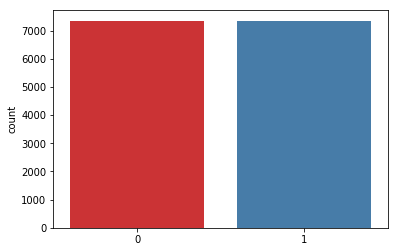

In [20]:
# should see class distribution now:
sns.countplot(y_resampled, label='Count', palette="Set1");

In [21]:
, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 123)

In [38]:
X_train

array([  1.50000000e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.50000000e+01,   8.41980000e+04,   1.08000000e+05,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00])

In [22]:
xg_cl.fit(X_train, y_train)

XGBClassifier(Objective='binary:logistic', base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
       subsample=1)

In [23]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test))/y_test.shape[0]
print("accuracy: %f" %(accuracy))

accuracy: 0.642760


Convert to dmatrix for cross val

In [40]:
clean_dmatrix = xgb.DMatrix(data = X_resampled,
                           label=y_resampled)

In [41]:
params = {"objective" : "binary:logistic", "max:depth" : 4}

In [42]:
cv_results = xgb.cv(dtrain=clean_dmatrix, params = params, nfold = 4,
                   num_boost_round = 10, metrics = "error", as_pandas = True)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000213094E8C50>>
Traceback (most recent call last):
  File "C:\Users\nicho\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [43]:
# Print cv_results
print(cv_results)


   test-error-mean  test-error-std  train-error-mean  train-error-std
0             0.35            0.01              0.34             0.00
1             0.33            0.02              0.32             0.00
2             0.32            0.01              0.31             0.01
3             0.32            0.01              0.30             0.00
4             0.32            0.01              0.30             0.00
5             0.32            0.01              0.29             0.00
6             0.31            0.00              0.29             0.00
7             0.31            0.01              0.28             0.01
8             0.31            0.01              0.28             0.00
9             0.30            0.01              0.27             0.00


In [44]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.69651875


Early stopping

In [45]:
cv_results = xgb.cv(dtrain=clean_dmatrix, params=params, nfold=4, 
                    num_boost_round=50, early_stopping_rounds=10, metrics="error", as_pandas=True, seed=123)

In [46]:
# Print cv_results
print(cv_results)

    test-error-mean  test-error-std  train-error-mean  train-error-std
0              0.35            0.01              0.34             0.00
1              0.33            0.02              0.32             0.01
2              0.33            0.01              0.31             0.00
3              0.32            0.01              0.30             0.00
4              0.32            0.01              0.30             0.00
5              0.32            0.01              0.29             0.00
6              0.31            0.01              0.28             0.01
7              0.31            0.01              0.28             0.00
8              0.31            0.01              0.28             0.01
9              0.30            0.01              0.27             0.00
10             0.30            0.01              0.27             0.00
11             0.30            0.01              0.27             0.00
12             0.30            0.01              0.27             0.00
13    

In [47]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.71732675


### Parameter tuning